In [1]:
import pandas as pd
import numpy as np

installs = pd.read_csv(r'C:\Users\Matias\Documents\UBA\Datos\installs.csv.gzip',compression = 'gzip')

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18


In [4]:
installs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 18 columns):
created               3412 non-null object
application_id        3412 non-null int64
ref_type              3412 non-null int64
ref_hash              3412 non-null int64
click_hash            0 non-null float64
attributed            3412 non-null bool
implicit              3412 non-null bool
device_countrycode    3412 non-null int64
device_brand          1047 non-null float64
device_model          3411 non-null float64
session_user_agent    3364 non-null object
user_agent            1729 non-null object
event_uuid            865 non-null object
kind                  865 non-null object
wifi                  1729 non-null object
trans_id              6 non-null object
ip_address            3412 non-null int64
device_language       3378 non-null float64
dtypes: bool(2), float64(4), int64(5), object(7)
memory usage: 433.2+ KB


In [5]:
installs['created'] = pd.to_datetime(installs['created'])
installs['hour'] = installs['created'].apply(lambda x: x.hour)
installs['hour'] = installs['hour'].astype('int8')

installs['day'] = installs['created'].apply(lambda x: x.day)
installs['day'] = installs['day'].astype('int8')

installs['installs_value'] = 1

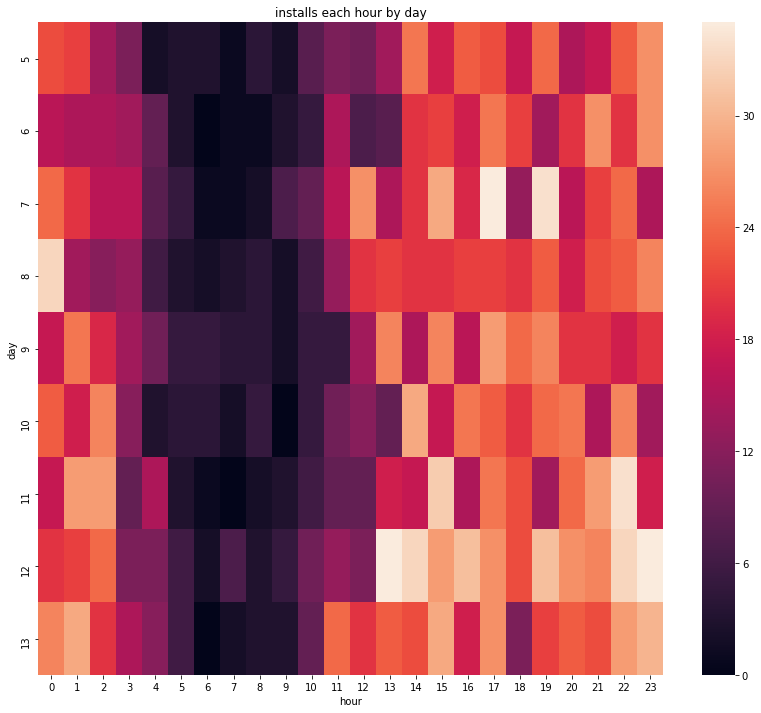

In [11]:
byHoursDays = installs.groupby(['day','hour']).agg({'installs_value':'sum'}).unstack()
byHoursDays.columns = byHoursDays.columns.get_level_values(1)
byHoursDays.fillna(0, inplace=True)
fig, ax = plt.subplots(figsize=(14,12)) 
ax.set_title('installs each hour by day')
sns.heatmap(byHoursDays,ax = ax)

In [7]:
topApps = installs.groupby('application_id').agg({'installs_value':'sum'}).nlargest(10,'installs_value')

In [8]:
topApps

,installs_value
application_id,
7,947
9,731
10,389
16,362
8,328
2,174
29,97
20,95
6,35


In [9]:
installs['application_id'].nunique()

31

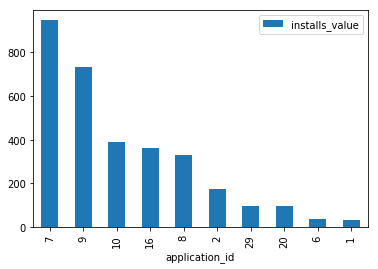

In [10]:
topApps.plot.bar()